<a href="https://colab.research.google.com/github/Swapnil-tripathi/Diabetes-Prediction-System/blob/main/Diabetes_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Diabetes Prediction System***

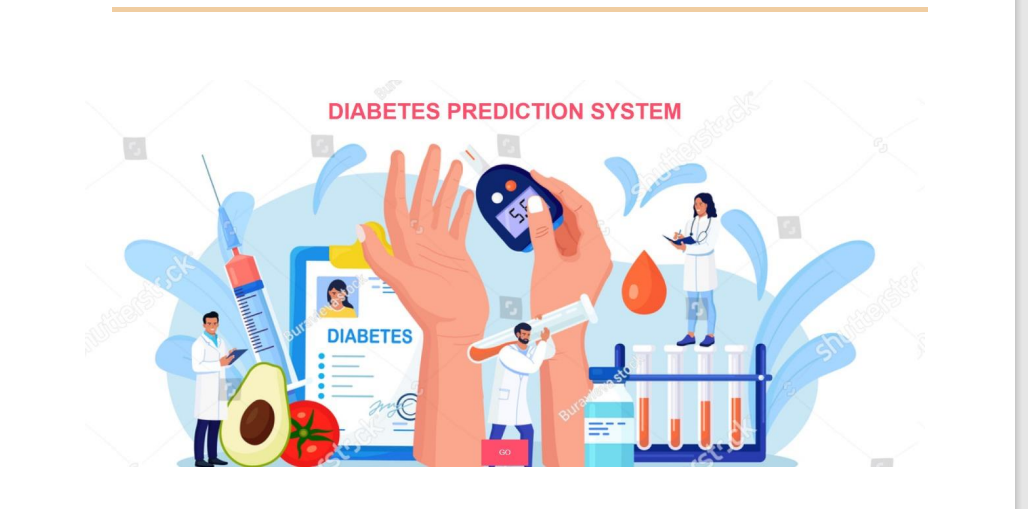

**Introduction:**

This dataset is originally from the National Institute of Diabetes and Digestive
and Kidney Diseases. The objective of the dataset is to diagnostically predict
whether a patient has diabetes based on certain diagnostic measurements
included in the dataset. Several constraints were placed on the selection of
these instances from a larger database. In particular, all patients here are
females at least 21 years old of Pima Indian heritage.


Let's dive in the dataset and understand the important factors.

* Pregnancies: To express the Number of pregnancies

* Glucose: To express the Glucose level in blood

* BloodPressure: To express the Blood pressure measurement

* SkinThickness: To express the thickness of the skin

* Insulin: To express the Insulin level in blood

* BMI: To express the Body mass index

* DiabetesPedigreeFunction: To express the Diabetes percentage

* Age: To express the age

* Outcome: To express the final result 1 is Yes and 0 is No

**Loading the libraries:**

In [ ]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset:**

In [ ]:
#Loading the dataset
df=pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Data Understanding & Exploration:**

In [ ]:
df.shape#Displays number of columns and rows i.e. there are 768 rows and 9 columns

(768, 9)

In [ ]:
df.columns#Displays name of all columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()#Gives the information about the dataset i.e. total number of columns,their datatypes and number of counts.
#There are total 768 rows and 9 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.head()#Displays top 5 rows of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()#Displays bottom 5 rows of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**Renaming the columns:**

In [ ]:
df.rename(columns={'BloodPressure':'Blood_Pressure','SkinThickness':'Skin_Thickness','DiabetesPedigreeFunction':'Diabetes_Pedigree_function'},inplace=True)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_Pedigree_function', 'Age', 'Outcome'],
      dtype='object')

As we can see from the information that all columns have 768 entries that means there is no blank space but we have to check whether a column contains 0 except for the outcome column if yes then we have to replace it with the mean value of the column.

In [ ]:
#Proportion of Anthropometry and physiological features that has zero value

glucose_zero=round((len(df[df['Glucose']==0]))/ len(df) *100,2)
bloodpressure_zero=round((len(df[df['Blood_Pressure']==0]))/ len(df) * 100,2)
skinthickness_zero=round((len(df[df['Skin_Thickness']==0]))/len(df)*100,2)
insulin_zero=round((len(df[df['Insulin']==0]))/len(df)*100,2)
bmi_zero=round((len(df[df['BMI']==0]))/len(df)*100,2)

print("{}% has 0 value in the Glucose feature.".format(glucose_zero))
print("{}% has 0 value in the Blood_Pressure feature.".format(bloodpressure_zero))
print("{}% has 0 value in the Skin_Thickness feature.".format(skinthickness_zero))
print("{}% has 0 value in the Insulin feature.".format(insulin_zero))
print("{}% has 0 value in the BMI feature.".format(bmi_zero))



0.65% has 0 value in the Glucose feature.
4.56% has 0 value in the Blood_Pressure feature.
29.56% has 0 value in the Skin_Thickness feature.
48.7% has 0 value in the Insulin feature.
1.43% has 0 value in the BMI feature.


Hence , from the above analysis we will replace 0 value with the mean value of that columns.
Those columns are Pregnancies,Glucose,BloodPresure,SkinThickness,Insulin & BMI.

In [ ]:
df['Glucose'].replace(0,df['Glucose'].mean(),inplace=True)
df['Blood_Pressure'].replace(0,df['Blood_Pressure'].mean(),inplace=True)
df['Skin_Thickness'].replace(0,df['Skin_Thickness'].mean(),inplace=True)
df['Insulin'].replace(0,df['Insulin'].mean(),inplace=True)
df['BMI'].replace(0,df['BMI'].mean(),inplace=True)

***Checking Outliers:***

In [ ]:
df.skew()

Pregnancies                   0.901674
Glucose                       0.533225
Blood_Pressure                0.173050
Skin_Thickness                1.226670
Insulin                       3.291825
BMI                           0.601103
Diabetes_Pedigree_function    1.919911
Age                           1.129597
Outcome                       0.635017
dtype: float64

From above we can conclude that Skin_Thickness,Insulin,Diabetes_Pedigree_Function & Age has skewness greater than 1.
So these features are right skewed and has outliers.

***Removing outliers from Skin_Thickness by using Winsorization Method:***

<Axes: xlabel='Skin_Thickness'>

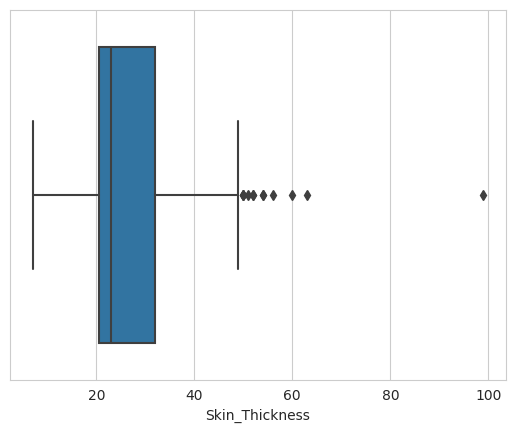

In [ ]:
sns.boxplot(data=df,x='Skin_Thickness')

In [ ]:
#q3 is the 75th percentile
q3=df['Skin_Thickness'].quantile(0.75)
print('Q3: ',q3)
#q1 is the 25th percentile
q1=df['Skin_Thickness'].quantile(0.25)
print('Q1: ',q1)
#iqr is the interquartile range
iqr=q3-q1
print('iqr: ',iqr)
#upper limit
upper_limit=q3+(1.5*iqr)
print('upper limit: ',upper_limit)
#lower limit
lower_limit=q1-(1.5*iqr)
print('lower limit: ',lower_limit)


Q3:  32.0
Q1:  20.536458333333332
iqr:  11.463541666666668
upper limit:  49.1953125
lower limit:  3.341145833333332


In [ ]:
df['Skin_Thickness']=df['Skin_Thickness'].clip(lower=3.341145833333332,upper=49.1953125)

**Removing Outliers from Insulin using Winsorization Method:**

<Axes: xlabel='Insulin'>

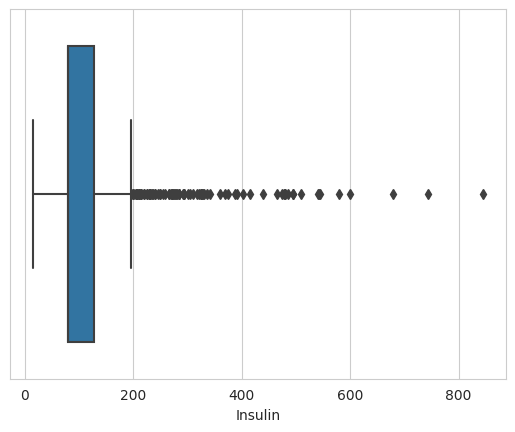

In [ ]:
sns.boxplot(data=df,x='Insulin')

In [ ]:
#q3 is the 75th percentile
q3=df['Insulin'].quantile(0.75)
print('Q3: ',q3)
#q1 is the 25th percentile
q1=df['Insulin'].quantile(0.25)
print('Q1: ',q1)
#iqr is the interquartile range
iqr=q3-q1
print('iqr: ',iqr)
#upper limit
upper_limit=q3+(1.5*iqr)
print('upper limit: ',upper_limit)
#lower limit
lower_limit=q1-(1.5*iqr)
print('lower limit: ',lower_limit)

Q3:  127.25
Q1:  79.79947916666667
iqr:  47.45052083333333
upper limit:  198.42578125
lower limit:  8.623697916666671


In [ ]:
df['Insulin']=df['Insulin'].clip(lower=8.63,upper=198.4)

**Removing Outliers from Diabetes_Pedigree_Function using Winsorization Method:**

<Axes: xlabel='Diabetes_Pedigree_function'>

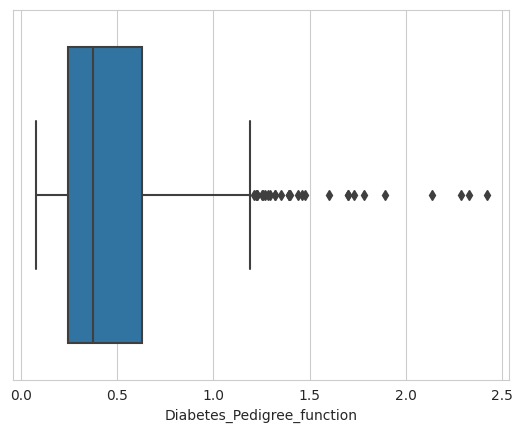

In [ ]:
sns.boxplot(data=df,x='Diabetes_Pedigree_function')

In [ ]:
#q3 is the 75th percentile
q3=df['Diabetes_Pedigree_function'].quantile(0.75)
print('Q3: ',q3)
#q1 is the 25th percentile
q1=df['Diabetes_Pedigree_function'].quantile(0.25)
print('Q1: ',q1)
#iqr is the interquartile range
iqr=q3-q1
print('iqr: ',iqr)
#upper limit
upper_limit=q3+(1.5*iqr)
print('upper limit: ',upper_limit)
#lower limit
lower_limit=q1-(1.5*iqr)
print('lower limit: ',lower_limit)

Q3:  0.62625
Q1:  0.24375
iqr:  0.38249999999999995
upper limit:  1.2
lower limit:  -0.32999999999999996


In [ ]:
df['Diabetes_Pedigree_function']=df['Diabetes_Pedigree_function'].clip(lower=-0.33,upper=1.2)

**Removing Outliers from Age using Winsorization Method:**

<Axes: xlabel='Age'>

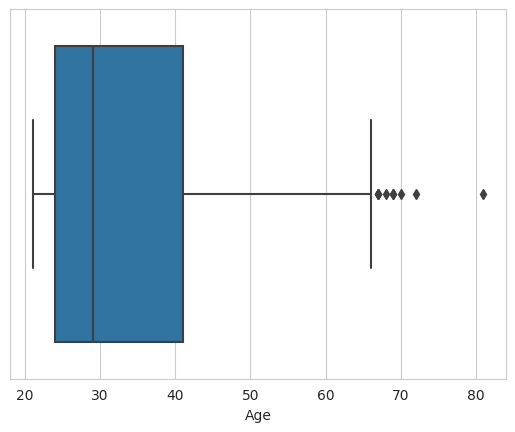

In [ ]:
sns.boxplot(data=df,x='Age')

In [ ]:
#q3 is the 75th percentile
q3=df['Age'].quantile(0.75)
print('Q3: ',q3)
#q1 is the 25th percentile
q1=df['Age'].quantile(0.25)
print('Q1: ',q1)
#iqr is the interquartile range
iqr=q3-q1
print('iqr: ',iqr)
#upper limit
upper_limit=q3+(1.5*iqr)
print('upper limit: ',upper_limit)
#lower limit
lower_limit=q1-(1.5*iqr)
print('lower limit: ',lower_limit)

Q3:  41.0
Q1:  24.0
iqr:  17.0
upper limit:  66.5
lower limit:  -1.5


In [ ]:
df['Age']=df['Age'].clip(lower=-1.5,upper=66.5)

In [ ]:
df.skew()

Pregnancies                   0.901674
Glucose                       0.533225
Blood_Pressure                0.173050
Skin_Thickness                0.664657
Insulin                       1.006613
BMI                           0.601103
Diabetes_Pedigree_function    1.024428
Age                           1.067170
Outcome                       0.635017
dtype: float64

So now all the features have data that are normally distributed.

**Relationship between each column can be achieved using the Pair-plot:**

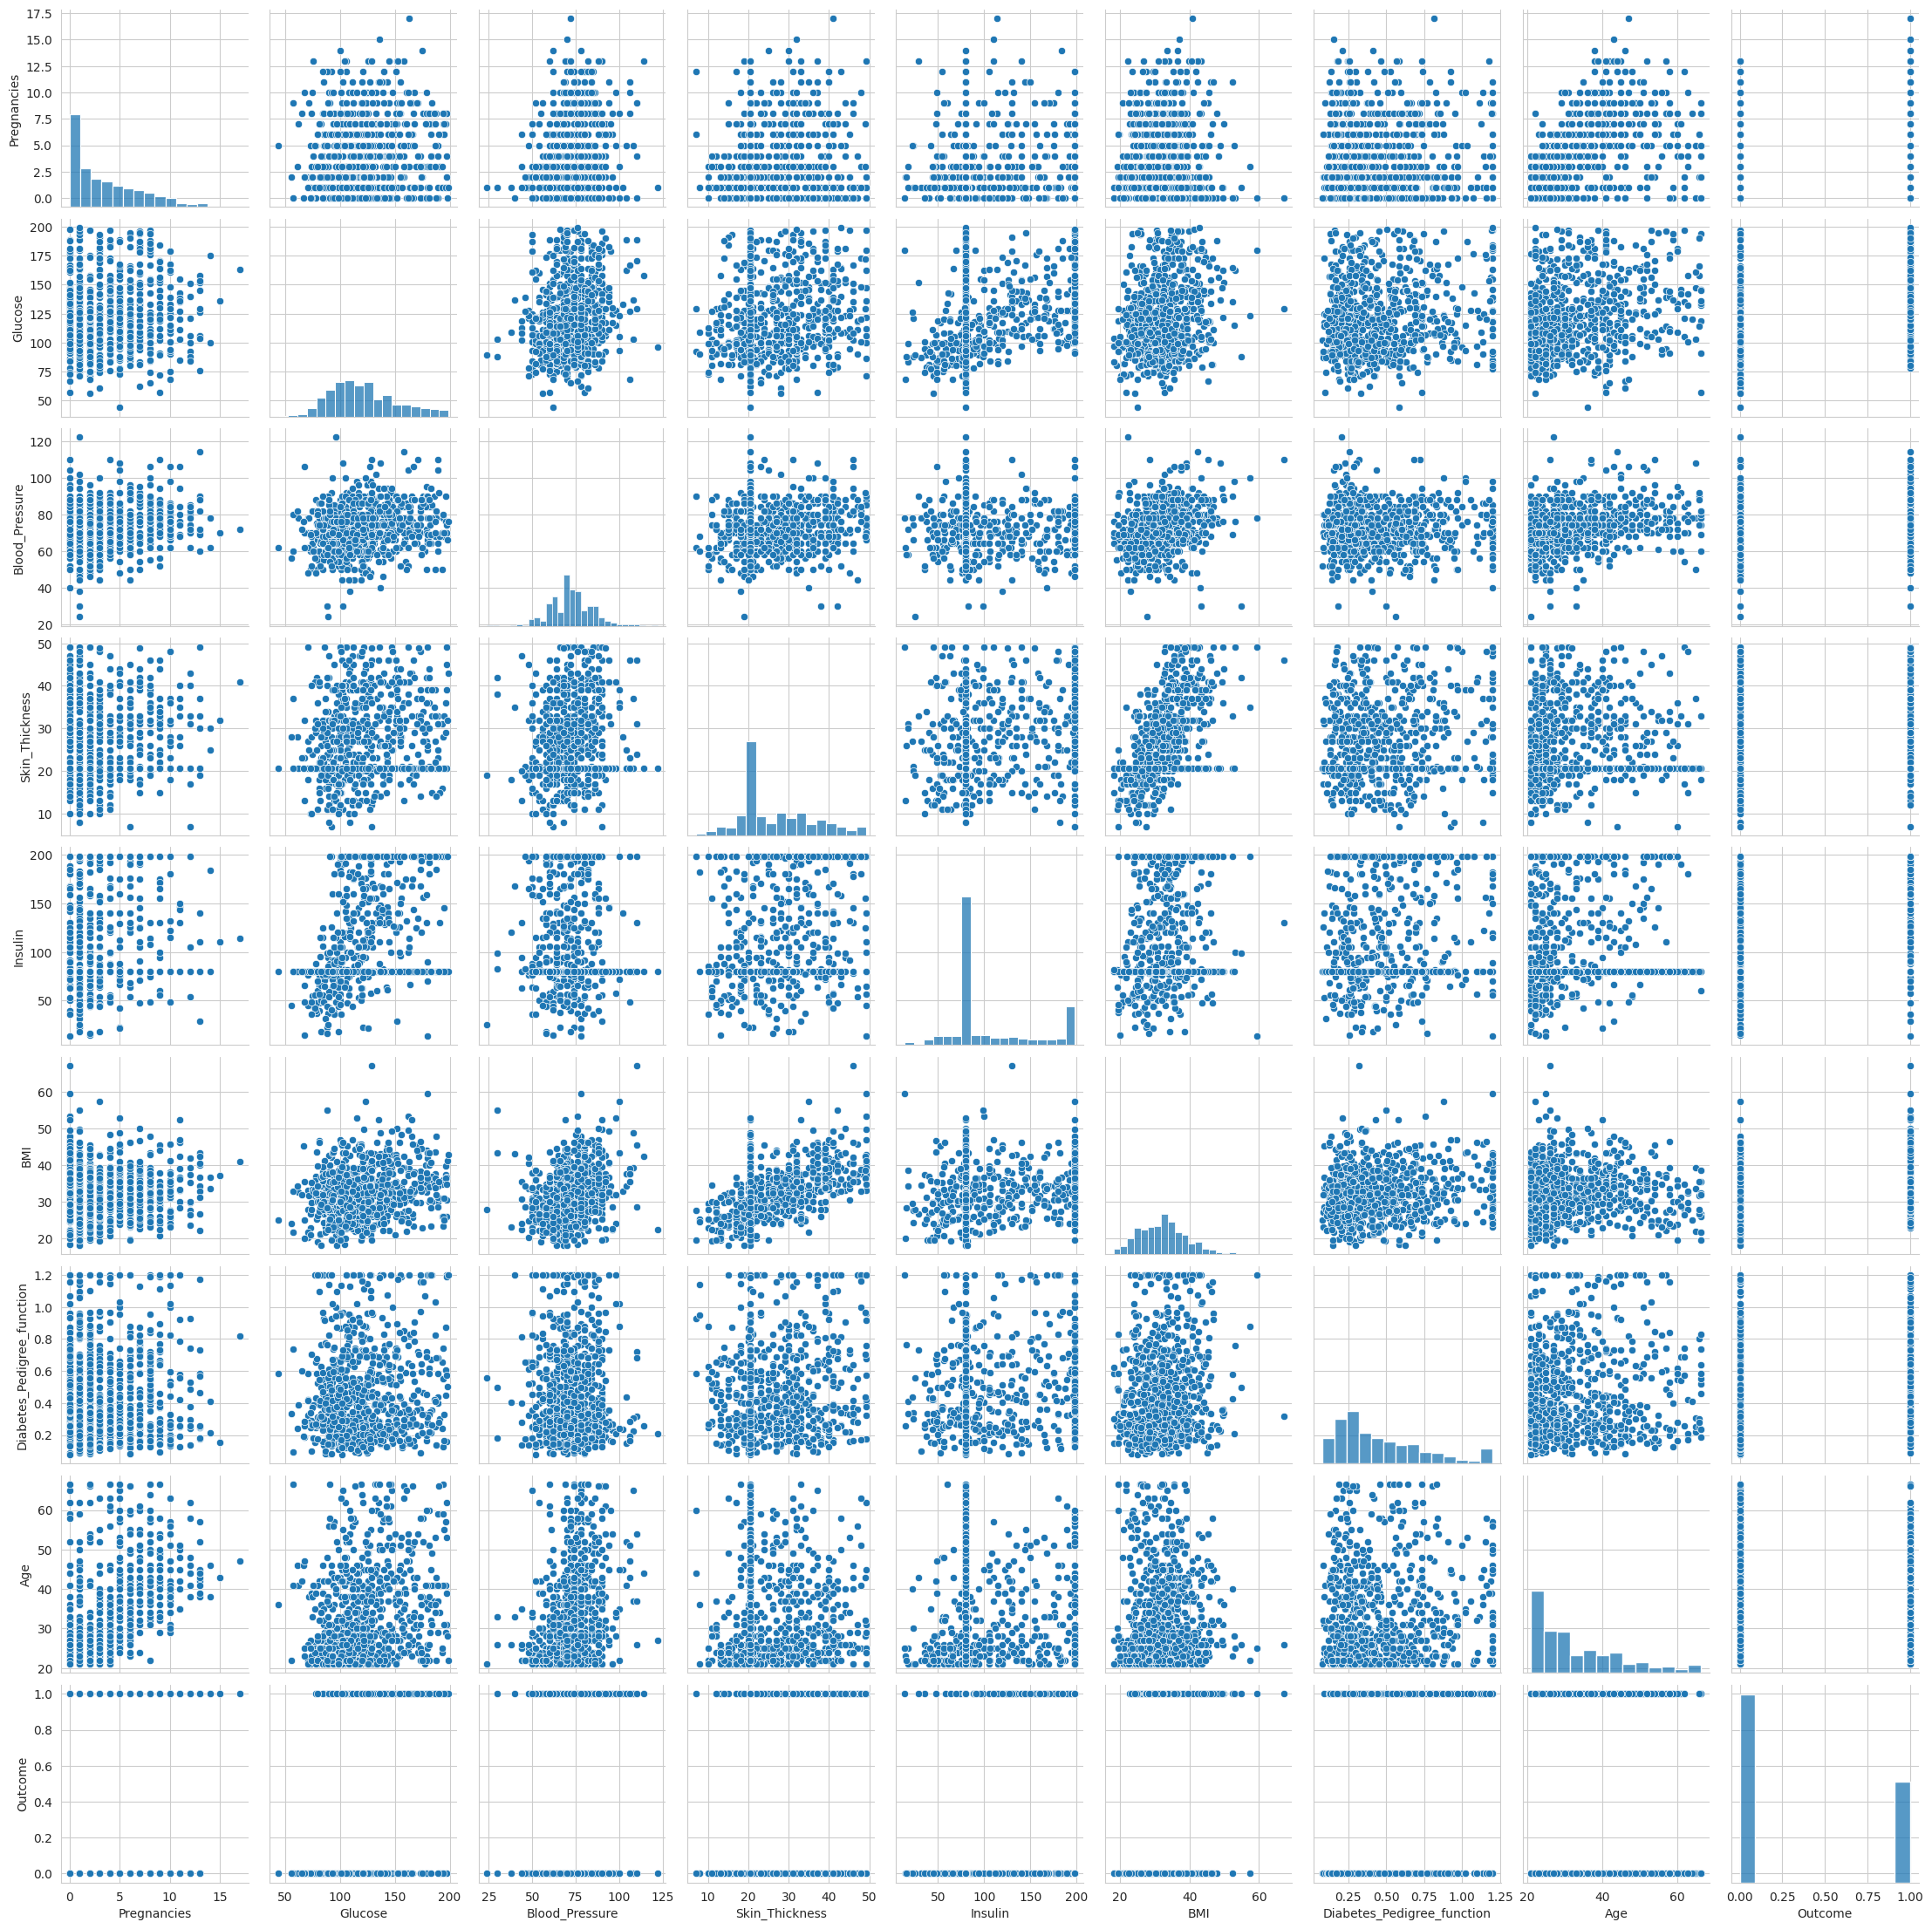

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df['Outcome'].value_counts()#Out of 768 people, 500 people are non-diabetic whereas 268 people are diabetic.

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

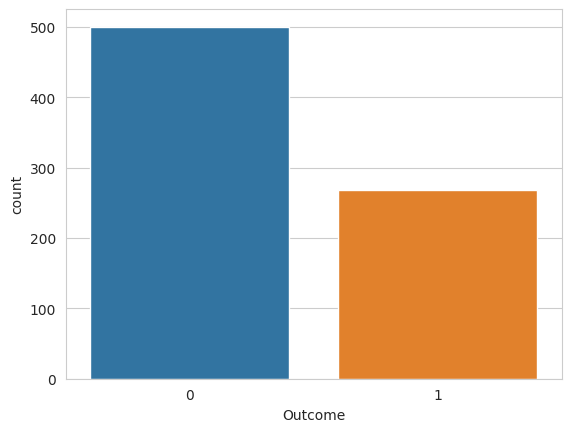

In [ ]:
sns.countplot(data=df,x='Outcome')

We have to predict that whether an individual is diabetic or not.
So it is a classification problem.Now we will use various classification algorithm to predict whether an individual is diabetic or not.

# ***Machine learning Models used for this Prediction:***
* Decision Tree Classifier
* Random Forest Classifier
* KNeighbor Classifier
* XGBoost Classifier
* AdaBoost Classifier

***Decision Tree Classifier***

In [ ]:
#Splitting feature and target variables
x=df[['Pregnancies','Glucose','Blood_Pressure','Skin_Thickness','Insulin','BMI','Diabetes_Pedigree_function']]#feature variable
y=df['Outcome']

#Splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Modelling
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

#Prediction
ypred_test=dt.predict(x_test)
ypred_train=dt.predict(x_train)

#Evaluating the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Train Accuracy: ',accuracy_score(y_train,ypred_train))
test_accuracy_dt=accuracy_score(y_test,ypred_test)
print('Test Accuracy: ',test_accuracy_dt)
print('Confusion matrix:\n',confusion_matrix(y_test,ypred_test))
print('Classification Report: \n',classification_report(y_test,ypred_test))

#Printing the prediction
print('Prediction:\n ',ypred_test)



Train Accuracy:  1.0
Test Accuracy:  0.7532467532467533
Confusion matrix:
 [[74 25]
 [13 42]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.75      0.80        99
           1       0.63      0.76      0.69        55

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.77      0.75      0.76       154

Prediction:
  [0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0
 0 1 0 1 1 0]


**Random Forest Classifier:**

In [ ]:
#Splitting feature and target variables
x=df[['Pregnancies','Glucose','Blood_Pressure','Skin_Thickness','Insulin','BMI','Diabetes_Pedigree_function']]#feature variable
y=df['Outcome']

#Splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Modelling
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

#Prediction
ypred_test=rf.predict(x_test)
ypred_train=rf.predict(x_train)

#Evaluating the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Train Accuracy: ',accuracy_score(y_train,ypred_train))
test_accuracy_randomforest=accuracy_score(y_test,ypred_test)
print('Test Accuracy: ',test_accuracy_randomforest)
print('Confusion matrix:\n',confusion_matrix(y_test,ypred_test))
print('Classification Report: \n',classification_report(y_test,ypred_test))

#Printing the prediction
print('Prediction:\n',ypred_test)


Train Accuracy:  1.0
Test Accuracy:  0.7272727272727273
Confusion matrix:
 [[76 23]
 [19 36]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.77      0.78        99
           1       0.61      0.65      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

Prediction:
 [0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0]


***KNeighbor Classifier:***

In [ ]:
#Splitting feature and target variables
x=df[['Pregnancies','Glucose','Blood_Pressure','Skin_Thickness','Insulin','BMI','Diabetes_Pedigree_function']]#feature variable
y=df['Outcome']

#Splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Modelling
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

#Prediction
ypred_test=knn.predict(x_test)
ypred_train=knn.predict(x_train)

#Evaluating the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Train Accuracy: ',accuracy_score(y_train,ypred_train))
test_accuracy_kneighbors=accuracy_score(y_test,ypred_test)
print('Test Accuracy: ',test_accuracy_kneighbors)
print('Confusion matrix:\n',confusion_matrix(y_test,ypred_test))
print('Classification Report: \n',classification_report(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('Cross Validation Score: ',cross_val_score(model,x_train,y_train,cv=5).mean())

#Printing the prediction
print('Prediction:\n',ypred_test)


Train Accuracy:  0.8110749185667753
Test Accuracy:  0.7272727272727273
Confusion matrix:
 [[78 21]
 [21 34]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Cross Validation Score:  0.7362121817939491
Prediction:
 [0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0]


***XGBoost Classifier:***

In [ ]:
#Splitting feature and target variables
x=df[['Pregnancies','Glucose','Blood_Pressure','Skin_Thickness','Insulin','BMI','Diabetes_Pedigree_function']]#feature variable
y=df['Outcome']

#Splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Modelling
import xgboost as xgb
xg=xgb.XGBClassifier()
xg.fit(x_train,y_train)

#Prediction
ypred_test=xg.predict(x_test)
ypred_train=xg.predict(x_train)

#Evaluating the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Train Accuracy: ',accuracy_score(y_train,ypred_train))
test_accuracy_xgboost=accuracy_score(y_test,ypred_test)
print('Test Accuracy: ',test_accuracy_xgboost)
print('Confusion matrix:\n',confusion_matrix(y_test,ypred_test))
print('Classification Report: \n',classification_report(y_test,ypred_test))

#Printing the prediction
print('Prediction:\n',ypred_test)

Train Accuracy:  1.0
Test Accuracy:  0.7077922077922078
Confusion matrix:
 [[73 26]
 [19 36]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154

Prediction:
 [0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0]


***AdaBoost Classifier:***

In [ ]:
#Splitting feature and target variables
x=df[['Pregnancies','Glucose','Blood_Pressure','Skin_Thickness','Insulin','BMI','Diabetes_Pedigree_function']]#feature variable
y=df['Outcome']

#Splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Modelling
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(n_estimators=80)
adb.fit(x_train,y_train)

#Prediction
ypred_test=adb.predict(x_test)
ypred_train=adb.predict(x_train)

#Evaluating the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Train Accuracy: ',accuracy_score(y_train,ypred_train))
test_accuracy_adaboost=accuracy_score(y_test,ypred_test)
print('Test Accuracy: ',test_accuracy_adaboost)
print('Confusion matrix:\n',confusion_matrix(y_test,ypred_test))
print('Classification Report: \n',classification_report(y_test,ypred_test))

#Printing the prediction
print('Prediction:\n',ypred_test)

Train Accuracy:  0.8306188925081434
Test Accuracy:  0.7532467532467533
Confusion matrix:
 [[78 21]
 [17 38]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

Prediction:
 [0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


**Comparison of Test Accuracy of all the models**

In [ ]:
models=pd.DataFrame({
    'Model': ['Decision Tree Classifier','Random Forest Classifier','KNN','XGBoost Classifier','Ada Boost Classifier'],
    'Score': [test_accuracy_dt,test_accuracy_randomforest,test_accuracy_kneighbors,test_accuracy_xgboost,test_accuracy_adaboost]
})
models.sort_values(by='Score',ascending=False)

,Model,Score
0,Decision Tree Classifier,0.753247
4,Ada Boost Classifier,0.753247
1,Random Forest Classifier,0.727273
2,KNN,0.727273
3,XGBoost Classifier,0.707792


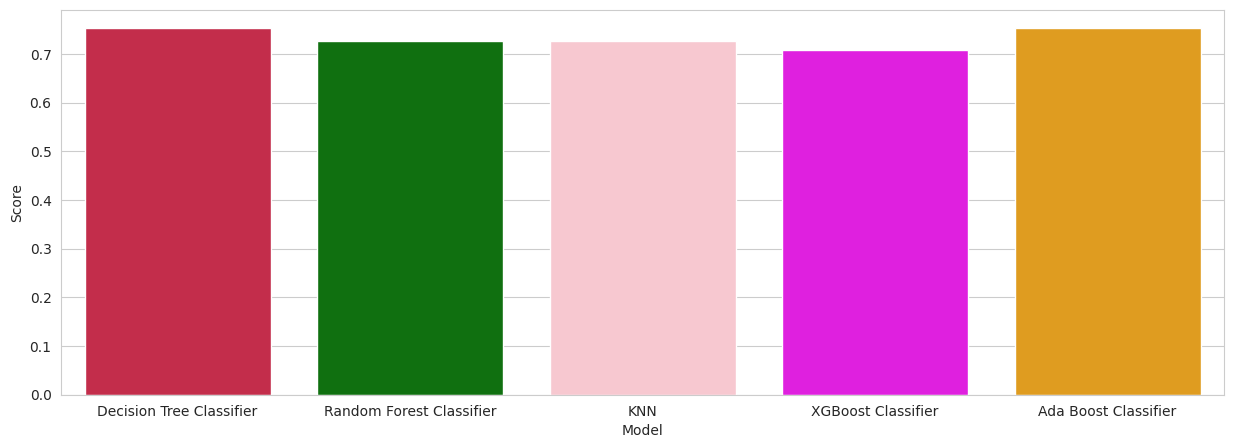

In [ ]:
colors = ["crimson", "green", "pink", "magenta","orange","purple"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

***Accuracy Score of Decision Tree  is maximum.***
**So I am using Decision Tree  to predict the outcome of diabetes.**